# Problem 1

In [1]:
import numpy as np

P = np.array([
    [0.5, 0.33, 0.17],
    [0, 0.33, 0.67],  
    [0.5, 0, 0.5]
])

def next_state(current_state):
    return np.random.choice([0, 1, 2], p=P[current_state])

np.random.seed(0)

In [8]:
# (c) P(X10 = 1 | X0 = 0)

def estimate_prob_X10_equals_1(initial_state=0, N=100, time_step=10):
    count = 0
    for _ in range(N):
        state = initial_state
        for _ in range(time_step):
            state = next_state(state)
        if state == 1:
            count += 1
    return count / N

prob_X10_equals_1 = estimate_prob_X10_equals_1()
print(f"P(X10 = 1 | X0 = 0): {prob_X10_equals_1:.4f}")

P(X10 = 1 | X0 = 0): 0.1600


In [9]:
# Part (d): Estimate E[X10 | X0 = 0]
def estimate_expected_X10(initial_state=0, N=100, time_step=10):
    total = 0
    for _ in range(N):
        state = initial_state
        for _ in range(time_step):
            state = next_state(state)
        total += state
    return total / N

expected_X10 = estimate_expected_X10()
print(f"E[X10 | X0 = 0]: {expected_X10:.4f}")

E[X10 | X0 = 0]: 1.1600


In [10]:
# Part (e): Estimate P(T <= 10 | X0 = 0), where T = min{n : Xn = 1}
def estimate_prob_T_leq_10(initial_state=0, N=100, time_limit=10):
    count = 0
    for _ in range(N):
        state = initial_state
        for step in range(time_limit + 1):
            if state == 1:
                count += 1
                break
            state = next_state(state)
    return count / N

prob_T_leq_10 = estimate_prob_T_leq_10()
print(f"P(T <= 10 | X0 = 0): {prob_T_leq_10:.4f}")

P(T <= 10 | X0 = 0): 0.8900


In [14]:
# Part (f): Estimate E[T | X0 = 0], where T = min{n : Xn = 1}
def estimate_expected_T(initial_state=0, N=100):
    total_steps = 0
    count = 0
    for _ in range(N):
        state = initial_state
        steps = 0
        while state != 1:
            state = next_state(state)
            steps += 1
            if steps > 100:  # Avoid infinite loop in case it never reaches state 1
                break
        if steps <= 100:
            total_steps += steps
            count += 1
    return total_steps / count if count > 0 else None

expected_T = estimate_expected_T()
print(f"E[T | X0 = 0]: {expected_T:.4f}")

E[T | X0 = 0]: 4.3500


In [11]:
# Part (g): Long-run proportions of visits to states 0, 1, and 2
def long_run_proportions(initial_state=0, steps=10000, burn_in=100):
    state_counts = np.zeros(3)
    state = initial_state
    for step in range(steps):
        state = next_state(state)
        if step >= burn_in:
            state_counts[state] += 1
    return state_counts / (steps - burn_in)

proportions = long_run_proportions()
print(f"Long-run proportions: State 0: {proportions[0]:.4f}, State 1: {proportions[1]:.4f}, State 2: {proportions[2]:.4f}")

Long-run proportions: State 0: 0.4031, State 1: 0.2058, State 2: 0.3911


In [16]:
# Part (h): Long-run average cost with costs 1, 3, and 2 for states 0, 1, and 2
def long_run_average_cost(initial_state=0, steps=10000, burn_in=100):
    costs = {0: 1, 1: 3, 2: 2}
    total_cost = 0
    state = initial_state
    for step in range(steps):
        state = next_state(state)
        if step >= burn_in:
            total_cost += costs[state]
    return total_cost / (steps - burn_in)

average_cost = long_run_average_cost()
print(f"Long-run average cost: {average_cost:.4f}")

Long-run average cost: 1.8014


# Problem 2

In [9]:
N = 100  
alpha = 0.2 
beta = 0.4  
initial_active = 10
total_steps = 10000
burn_in = 1000   


def simulate_X_chain(N, alpha, beta, initial_active, total_steps, burn_in):
    X_n = initial_active
    active_counts = [] 

    for step in range(total_steps):
        new_active_count = 0 

        # Currently active individua
        for _ in range(X_n):
            if np.random.uniform(0, 1) < alpha:  
                # If active individual remains active
                new_active_count += 1  # Increment active count
            elif np.random.uniform(0, 1) > alpha:  
                # If this condition is not met, the individual becomes inactive, so no increment
                new_active_count += 0
            
        # Currently inactive individual
        for _ in range(N - X_n):
            if np.random.uniform(0, 1) >= beta:  
                # If inactive individual becomes active
                new_active_count += 1  # Increment active count
            elif np.random.uniform(0, 1) < beta:  
                # If this condition is not met, the individual remains inactive, so no increment
                new_active_count += 0 
            
        X_n = new_active_count

        if step >= burn_in:
            active_counts.append(X_n)

    long_run_average = np.mean(active_counts)
    return long_run_average

long_run_average_active = simulate_X_chain(N, alpha, beta, initial_active, total_steps, burn_in)
print(f"Long-run average number of active individuals: {long_run_average_active:.2f}")

Long-run average number of active individuals: 42.90


In [14]:
initial_Y = 10
initial_Z = 0

def simulate_YZ_chain(N, alpha, beta, initial_Y, initial_Z, total_steps, burn_in):
    Y_n = initial_Y 
    Z_n = initial_Z
    Y_greater_than_Z_count = 0  

    for step in range(total_steps):
        new_Y_n = 0
        new_Z_n = 0

        # Initially active individual
        for _ in range(Y_n):
            if np.random.uniform(0, 1) < alpha:
                # Remains active
                new_Y_n += 1

        # Initially inactive individual who became active (in Zn)
        for _ in range(Z_n):
            if np.random.uniform(0, 1) < beta:
                # Remains inactive, so not counted in new_Z_n
                continue
            else:
                # Becomes active
                new_Z_n += 1

        # Initially inactive individuals who might become active
        for _ in range(N - initial_Y - Z_n):
            if np.random.uniform(0, 1) >= beta:
                # Becomes active
                new_Z_n += 1

        Y_n = new_Y_n
        Z_n = new_Z_n

        if step >= burn_in:
            if Y_n > Z_n:
                Y_greater_than_Z_count += 1

    long_run_probability = Y_greater_than_Z_count / (total_steps - burn_in)
    return long_run_probability

long_run_probability_Y_greater_Z = simulate_YZ_chain(N, alpha, beta, initial_Y, initial_Z, total_steps, burn_in)
print(f"Long-run probability that more active individuals come from the initially active group than the initially inactive group: {long_run_probability_Y_greater_Z:.4f}")

Long-run probability that more active individuals come from the initially active group than the initially inactive group: 0.0000


# Problem 3

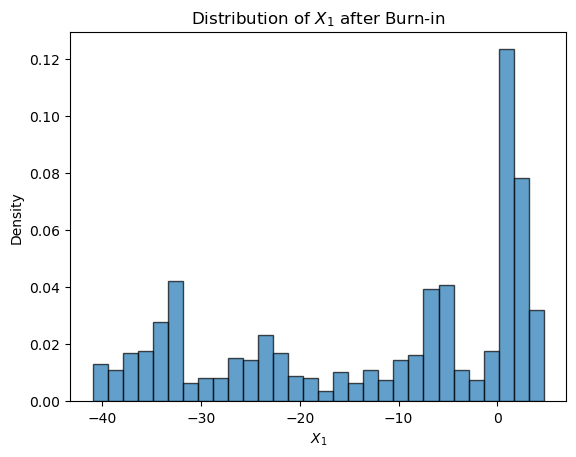

In [21]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 1000   
burn_in = 100           
initial_value = 20**(1/10) 
num_variables = 10

def target_density(X):
    if np.prod(X) > 20:
        return np.exp(-np.sum(X))  
    else:
        return 0 

def propose_new_state(current_state):
    return current_state + np.random.uniform(-1, 1, size=len(current_state))

X = np.full(num_variables, initial_value)  
samples_X1 = []  

# Run Metropolis-Hastings algorithm
for step in range(num_steps):
    proposed_X = propose_new_state(X)
    
    current_density = target_density(X)
    proposed_density = target_density(proposed_X)
    
    acceptance_prob = min(proposed_density / current_density, 1) if current_density > 0 else 0

    if np.random.uniform(0, 1) < acceptance_prob:
        X = proposed_X  
    
    if step >= burn_in:
        samples_X1.append(X[0])  

plt.hist(samples_X1, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.title('Distribution of $X_1$ after Burn-in')
plt.xlabel('$X_1$')
plt.ylabel('Density')
plt.show()

# Problem 4

In [23]:
def joint_density(x, y, z):
    if x > 0 and y > 0 and z > 0:
        return np.exp(-(x + y + z + x*y + x*z + y*z))
    return 0

def metropolis_hastings(num_steps=1000, burn_in=100):
    x, y, z = 1.0, 1.0, 1.0
    xyz_values = [] 

    for step in range(num_steps):
        x_prime = x + np.random.uniform(-1, 1)
        y_prime = y + np.random.uniform(-1, 1)
        z_prime = z + np.random.uniform(-1, 1)
        
        current_density = joint_density(x, y, z)
        proposed_density = joint_density(x_prime, y_prime, z_prime)
        
        alpha = min(proposed_density / current_density, 1) if current_density > 0 else 0
        if np.random.uniform(0, 1) < alpha:
            x, y, z = x_prime, y_prime, z_prime 
            
        if step >= burn_in:
            xyz_values.append(x * y * z)
    
    return np.mean(xyz_values)

estimated_expectation_mh = metropolis_hastings()
print(f"Estimated E[XYZ] using Metropolis-Hastings: {estimated_expectation_mh:.4f}")

Estimated E[XYZ] using Metropolis-Hastings: 0.0839


In [24]:
def gibbs_sampler(num_steps=1000, burn_in=100):
    x, y, z = 1.0, 1.0, 1.0
    xyz_values = []

    for step in range(num_steps):
        # Sample x given y, z
        x = np.random.exponential(scale=1 / (1 + y + z))
        
        # Sample y given x, z
        y = np.random.exponential(scale=1 / (1 + x + z))
        
        # Sample z given x, y
        z = np.random.exponential(scale=1 / (1 + x + y))
        
        if step >= burn_in:
            xyz_values.append(x * y * z)
            
    return np.mean(xyz_values)

estimated_expectation_gibbs = gibbs_sampler()
print(f"Estimated E[XYZ] using Gibbs Sampler: {estimated_expectation_gibbs:.4f}")

Estimated E[XYZ] using Gibbs Sampler: 0.0806
